#  YOLOv11 and sahi for improved small object detection

### Installing Ultralytics and sahi

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [ ]:
!pip install sahi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.13.0.90
    Uninstalling opencv-python-4.13.0.90:
      Successfully uninstalled opencv-python-4.13.0.90


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Preparation

[Dataset LINK](https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw)

Download the Dataset in YOLOv11 format from Roboflow Universe

Finally Upload the dataset in Google Drive

In [ ]:
%cd /content/drive/MyDrive/Yolo_Datasets

/content/drive/MyDrive/Yolo_Datasets


In [ ]:
!unzip /content/drive/MyDrive/Yolo_Datasets/RPSdataset.zip

Archive:  /content/drive/MyDrive/Yolo_Datasets/RPSdataset.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Using the Command Line Interface

### Starting the Training Procedure

In [ ]:
# Train YOLO11n on  Dataset for 50 epochs
!yolo train model=yolo11m.pt data="/content/drive/MyDrive/Yolo_Datasets/data.yaml" epochs=50 imgsz=640

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Yolo_Datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

In [22]:
# Validate Trained Model on Validation Set
!yolo val model="/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/Yolo_Datasets/data.yaml"

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 76.4 KB)
val: Scanning /content/drive/MyDrive/Yolo_Datasets/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 299/299 54.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 11.9s/it 3:45
                   all        299       7082      0.774      0.761      0.782       0.59
               Bicycle         33         34      0.937      0.878      0.875      0.718
                   Bus         36         37      0.633      0.649      0.625      0.496
                   Car        299       4053      0.791      0.783      0.851       0.67
                 Lorry        235        780      0.704      0.821      0.781      0.584
            Motorcycle        

### Inferencing with our trained Model


--- Raw YOLO Predict Output ---
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,887 parameters, 0 gradients, 67.7 GFLOPs

image 1/1 /content/drive/MyDrive/Yolo_Datasets/test/images/best_image_test .jpg: 640x640 26 Cars, 3 Lorrys, 14 Motorcycles, 36.9ms
Speed: 4.9ms preprocess, 36.9ms inference, 31.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/Yolo_Datasets/runs/detect/predict25
1 label saved to /content/drive/MyDrive/Yolo_Datasets/runs/detect/predict25/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


--- Extracted Object Detection Summary ---
Objects detected: 26 Cars, 3 Lorrys, 14 Motorcycles
Total objects detected: 43

--- Predicted Image from /content/drive/MyDrive/Yolo_Datasets/runs/detect/predict25/best_image_test .jpg ---


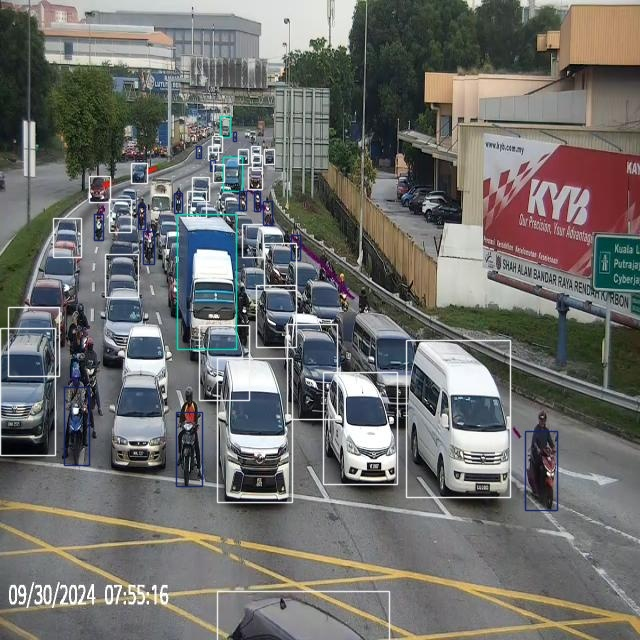

In [ ]:
# Visualize the Predicted image function
import cv2
from google.colab.patches import cv2_imshow

def show_image(image_path):
    """
    Function to display an image using OpenCV in Google Colab.

    Parameters:
    - image_path (str): Path to the image file.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    cv2_imshow(image)
import subprocess
import re
import cv2
from google.colab.patches import cv2_imshow
import os

# ANSI escape code stripper
def strip_ansi_codes(text):
    ansi_escape = re.compile(r'\x1b\[([0-9]{1,2}(;[0-9]{1,2})*)?m')
    return ansi_escape.sub('', text)

# Define confidence threshold (0.0 to 1.0)
# Lowering this value will show more detections, potentially including less confident ones.
# Increasing it will only show more confident detections.
confidence_threshold = 0.3

# Construct the YOLO predict command with custom visualization options
predict_command = [
    "yolo", "predict",
    "model=/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt",
    "source=/content/drive/MyDrive/Yolo_Datasets/test/images/best_image_test .jpg", # Consistent image path
    f"conf={confidence_threshold}",
    "save_txt=True", # Save labels to .txt files (required for custom drawing)
    "show_labels=False", # Hide labels
    "line_width=1" # Make bounding boxes thin
]

# Run the command and capture its output
try:
    result = subprocess.run(predict_command, capture_output=True, text=True, check=True)
    full_output = result.stdout
    error_output = result.stderr
except subprocess.CalledProcessError as e:
    full_output = e.stdout
    error_output = e.stderr
    print(f"Error during YOLO prediction: {e}")

# Print the raw output from YOLO for full context
print("\n--- Raw YOLO Predict Output ---")
print(full_output)
if error_output:
    print("\n--- YOLO Predict Errors (if any) ---")
    print(error_output)

# Strip ANSI codes for parsing
cleaned_output = strip_ansi_codes(full_output)

# Parse the output to find the object detection summary
detection_summary_str = "No object detection summary found in output."
total_objects_detected = 0
for line in cleaned_output.splitlines(): # Use cleaned_output here
    match = re.search(r'image \d+/\d+ .*?: \d+x\d+\s*(.*?)(?:, \d+\.\d+ms)?$', line)
    if match:
        objects_info = match.group(1).strip()
        if objects_info:
            detection_summary_str = f"Objects detected: {objects_info}"
            counts = re.findall(r'(\d+)\s+\w+', objects_info)
            total_objects_detected = sum(int(c) for c in counts)
            break

print("\n--- Extracted Object Detection Summary ---")
print(detection_summary_str)
print(f"Total objects detected: {total_objects_detected}")

# --- Automatically display predicted image ---
# Extract the dynamically generated output path for the image
predicted_image_path = None
for line in cleaned_output.splitlines():
    # Look for the line indicating where results are saved and extract the path
    match = re.search(r'Results saved to (.*)$', line) # Updated regex to be more general
    if match:
        output_dir = match.group(1)
        # Correctly extract filename from source argument (predict_command[3])
        image_filename_from_source = os.path.basename(predict_command[3].split('=')[1]) # Extract filename from the source argument directly
        predicted_image_path = os.path.join(output_dir, image_filename_from_source)
        break

if predicted_image_path and os.path.exists(predicted_image_path):
    print(f"\n--- Predicted Image from {predicted_image_path} ---")
    predicted_image = cv2.imread(predicted_image_path)
    if predicted_image is not None:
        cv2_imshow(predicted_image)
    else:
        print(f"Error: Could not load the predicted image from {predicted_image_path}")
else:
    print("\nError: Could not find or load the predicted image path.")

YOLOv11 model loaded successfully with SAHI using AutoDetectionModel.from_pretrained.
Successfully loaded image from: /content/drive/MyDrive/Yolo_Datasets/test/images/best_image_test .jpg
Image dimensions: (640, 640, 3)
Loaded class names: ['Bicycle', 'Bus', 'Car', 'Lorry', 'Motorcycle']
Performing prediction on 16 slices.

--- SAHI Object Detection Summary ---
Objects detected: 1 Buss, 35 Cars, 12 Lorrys, 19 Motorcycles
Total objects detected: 67
Error: Could not load visualized image from /content/sahi_output/sahi_predicted_image.jpg.png.
Bounding boxes drawn on the image (without labels).


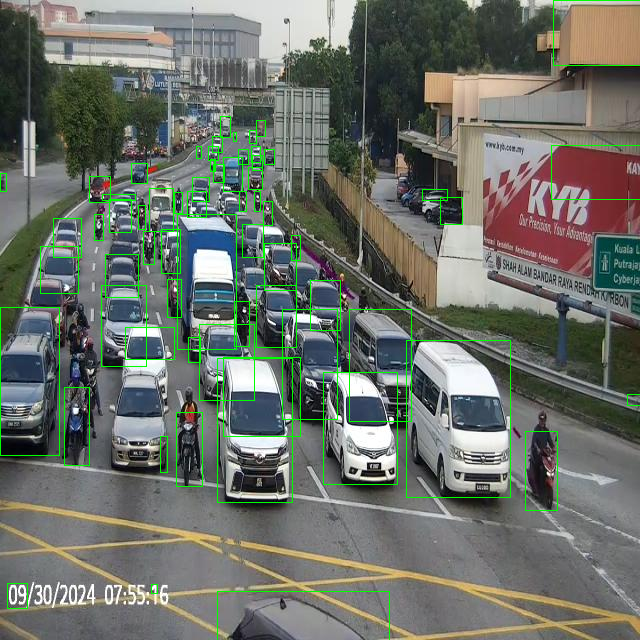

Image with bounding boxes displayed.


In [21]:
from sahi.auto_model import AutoDetectionModel
from sahi.predict import get_sliced_prediction

# Define model path and image path
yolo_model_path = "/content/drive/MyDrive/Yolo_Datasets/runs/detect/train/weights/best.pt"


# Load the YOLOv11 model using SAHI's from_pretrained method
detection_model = AutoDetectionModel.from_pretrained(
                                 model_type="yolov11",
                                 model_path=yolo_model_path,
                                 confidence_threshold=0.25,
                                 image_size=640)

print("YOLOv11 model loaded successfully with SAHI using AutoDetectionModel.from_pretrained.")
import cv2
import os
import yaml # Import yaml to read data.yaml

# Assuming base_image_path is already defined (from a previous cell or runtime context)
# For robustness, let's ensure base_image_path is defined if not present in the kernel state
if 'base_image_path' not in locals() and 'base_image_path' not in globals():
    base_image_path = '/content/drive/MyDrive/Yolo_Datasets/test/images/' # Default or inferred path

# 1. Define the full path to the original image
image_filename = "/content/drive/MyDrive/Yolo_Datasets/test/images/best_image_test .jpg" # Corrected filename
original_image_path = os.path.join(base_image_path, image_filename)

# 2. Use the cv2.imread() function to load the image
image_with_boxes = cv2.imread(original_image_path)

if image_with_boxes is not None:
    print(f"Successfully loaded image from: {original_image_path}")
    print(f"Image dimensions: {image_with_boxes.shape}")
else:
    print(f"Error: Could not load image from: {original_image_path}")

# 3. Load class names from data.yaml (still needed if `detection_data` parsing relies on it indirectly)
# Although labels are not drawn, `class_names` might be used in other parts of the workflow if re-introduced.
data_yaml_path = '/content/drive/MyDrive/Yolo_Datasets/data.yaml'
class_names = []
if os.path.exists(data_yaml_path):
    with open(data_yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)
        if 'names' in data_yaml:
            class_names = data_yaml['names']
            print(f"Loaded class names: {class_names}")
        else:
            print(f"'names' key not found in {data_yaml_path}")
else:
    print(f"Error: data.yaml not found at {data_yaml_path}")
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

# Perform sliced prediction
sliced_prediction_result = get_sliced_prediction(
    original_image_path, # Changed 'image_path' to 'original_image_path'
    detection_model,
    slice_height=200,
    slice_width=200,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

# Extract and print detection summary
object_counts = {}
total_objects_detected = 0
for detection in sliced_prediction_result.object_prediction_list:
    class_name = detection.category.name
    object_counts[class_name] = object_counts.get(class_name, 0) + 1
    total_objects_detected += 1

detection_summary_str = ", ".join([f"{count} {name}s" for name, count in object_counts.items()])

print("\n--- SAHI Object Detection Summary ---")
print(f"Objects detected: {detection_summary_str}")
print(f"Total objects detected: {total_objects_detected}")

# Define the output path for the visualized image
output_image_dir = "/content/sahi_output"
output_image_filename = "sahi_predicted_image.jpg.png" # Corrected filename based on previous output

# Create the directory if it doesn't exist
os.makedirs(output_image_dir, exist_ok=True)

# Visualize the predictions and save to file
sliced_prediction_result.export_visuals(
    export_dir=output_image_dir,
    file_name=output_image_filename
)

# Construct the full path
output_image_path = os.path.join(output_image_dir, output_image_filename)

# Read the saved image for display
output_image = cv2.imread(output_image_path)

# Display the image using cv2_imshow
if output_image is not None:
    print(f"\n--- SAHI Predicted Image from {output_image_path} ---")
    cv2_imshow(output_image)
else:
    print(f"Error: Could not load visualized image from {output_image_path}.")
import cv2

# Assuming image_with_boxes, and class_names are available from previous steps

# Get image dimensions (already loaded as image_with_boxes)
img_height, img_width, _ = image_with_boxes.shape

# Draw bounding boxes on the image
# Iterate through the object_prediction_list from the SAHI sliced prediction result
for detection in sliced_prediction_result.object_prediction_list:
    # SAHI's bbox provides minx, miny, maxx, maxy in pixel coordinates
    x1 = int(detection.bbox.minx)
    y1 = int(detection.bbox.miny)
    x2 = int(detection.bbox.maxx)
    y2 = int(detection.bbox.maxy)

    # Get the class ID
    class_id = detection.category.id

    # Draw the rectangle (bounding box)
    # Color: Green (0, 255, 0) in BGR format for OpenCV
    # Thickness: 1 (thin green box)
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 1)

# Labels have been removed as per user request
print("Bounding boxes drawn on the image (without labels).")
from google.colab.patches import cv2_imshow

# Display the image with the drawn bounding boxes
cv2_imshow(image_with_boxes)

print("Image with bounding boxes displayed.")